# ML GPU Platform - Quick Start Guide
## Demo Mode
This notebook runs in **demo mode** with simulated data for presentation purposes.

## 1. Setup and Imports

In [1]:
import sys
sys.path.insert(0, '..')

# Demo mode - skip package installation for faster execution
print("📦 Packages: celery, redis (already installed)")
print()

from src.scheduler.job_queue import JobConfig, Priority
from src.resources.gpu_manager import get_gpu_manager
from src.monitoring.logger import setup_logging

# Setup logging
setup_logging(level="INFO")

print("✓ Imports successful!")

📦 Packages: celery, redis (already installed)

2025-10-09 20:40:04 - root - INFO - Logging initialized at level INFO [logger.py:202]
✓ Imports successful!


## 2. Check GPU Availability

In [2]:
# Get GPU manager
gpu_manager = get_gpu_manager()

# Demo: Simulate GPU data if no GPUs available
if gpu_manager.num_gpus == 0:
    print("⚠️  Demo Mode: Simulating 4 NVIDIA GPUs\n")
    print(f"Total GPUs: 4 (simulated)")
    print(f"\nGPU Details:")
    
    # Simulate GPU info
    simulated_gpus = [
        {"id": 0, "name": "NVIDIA A100-SXM4-40GB", "memory_used": 8.2, "memory_total": 40.0, "utilization": 45.3, "temperature": 52.0},
        {"id": 1, "name": "NVIDIA A100-SXM4-40GB", "memory_used": 12.5, "memory_total": 40.0, "utilization": 78.2, "temperature": 58.5},
        {"id": 2, "name": "NVIDIA A100-SXM4-40GB", "memory_used": 2.1, "memory_total": 40.0, "utilization": 12.8, "temperature": 48.0},
        {"id": 3, "name": "NVIDIA A100-SXM4-40GB", "memory_used": 0.8, "memory_total": 40.0, "utilization": 5.2, "temperature": 45.5}
    ]
    
    for gpu in simulated_gpus:
        print(f"\n  GPU {gpu['id']}: {gpu['name']}")
        print(f"    Memory: {gpu['memory_used']:.1f}GB / {gpu['memory_total']:.1f}GB")
        print(f"    Utilization: {gpu['utilization']:.1f}%")
        print(f"    Temperature: {gpu['temperature']:.1f}°C")
else:
    print(f"Total GPUs: {gpu_manager.num_gpus}")
    print(f"\nGPU Details:")
    for gpu_info in gpu_manager.get_all_gpu_info():
        print(f"\n  GPU {gpu_info.id}: {gpu_info.name}")
        print(f"    Memory: {gpu_info.used_memory / (1024**3):.1f}GB / {gpu_info.total_memory / (1024**3):.1f}GB")
        print(f"    Utilization: {gpu_info.utilization:.1f}%")
        if gpu_info.temperature:
            print(f"    Temperature: {gpu_info.temperature:.1f}°C")

2025-10-09 20:40:08 - src.resources.gpu_manager - WARNING - No CUDA-capable GPUs detected [gpu_manager.py:94]
⚠️  Demo Mode: Simulating 4 NVIDIA GPUs

Total GPUs: 4 (simulated)

GPU Details:

  GPU 0: NVIDIA A100-SXM4-40GB
    Memory: 8.2GB / 40.0GB
    Utilization: 45.3%
    Temperature: 52.0°C

  GPU 1: NVIDIA A100-SXM4-40GB
    Memory: 12.5GB / 40.0GB
    Utilization: 78.2%
    Temperature: 58.5°C

  GPU 2: NVIDIA A100-SXM4-40GB
    Memory: 2.1GB / 40.0GB
    Utilization: 12.8%
    Temperature: 48.0°C

  GPU 3: NVIDIA A100-SXM4-40GB
    Memory: 0.8GB / 40.0GB
    Utilization: 5.2%
    Temperature: 45.5°C


## 3. Check System Health

In [3]:
# Demo: Simulate health check data
print("Health Summary:")
print("  Healthy: 4 GPUs")
print("  Degraded: 0")
print("  Unhealthy: 0")
print("  Unknown: 0")
print("\n✓ All systems operational")

Health Summary:
  Healthy: 4 GPUs
  Degraded: 0
  Unhealthy: 0
  Unknown: 0

✓ All systems operational


## 4. Create Your First Job

In [4]:
# Create job configuration
job_config = JobConfig(
    job_id="quickstart-job-001",
    user_id="notebook-user",
    job_type="fine_tuning",
    
    # Resource requirements
    num_gpus=1,
    pool_type="development",
    is_preemptible=False,
    
    # Model and data
    model_name="bert-base-uncased",
    dataset_path="./data/sample_train.csv",
    output_dir="./output/quickstart",
    
    # Job metadata
    priority="MEDIUM",
    estimated_duration=1800,  # 30 minutes
    
    # Training config
    config={
        "batch_size": 8,
        "learning_rate": 2e-5,
        "num_epochs": 2,
        "max_seq_length": 128,
        "max_steps": 100
    }
)

print("Job configuration created!")
print(f"  Job ID: {job_config.job_id}")
print(f"  Model: {job_config.model_name}")
print(f"  GPUs: {job_config.num_gpus}")
print(f"  Priority: {job_config.priority}")
print(f"  Estimated duration: {job_config.estimated_duration//60} minutes")

Job configuration created!
  Job ID: quickstart-job-001
  Model: bert-base-uncased
  GPUs: 1
  Priority: MEDIUM
  Estimated duration: 30 minutes


## 5. Submit Job to Queue (Demo)

In [5]:
# Demo mode - simulate successful submission
print("Submitting job to queue...")
print()
print("✓ Job submitted successfully!")
print(f"  Job ID: {job_config.job_id}")
print(f"  Queue position: 1")
print(f"  Status: pending")
print()
print("💡 In production, this connects to Redis + Celery")

Submitting job to queue...

✓ Job submitted successfully!
  Job ID: quickstart-job-001
  Queue position: 1
  Status: pending

💡 In production, this connects to Redis + Celery


## 6. Check Queue Status (Demo)

In [6]:
# Demo: Simulate queue status
print("Queue position: 1")
print()
print("Queue Summary:")
print("  Total jobs: 3")
print("  Priority breakdown:")
print("    HIGH: 0 jobs")
print("    MEDIUM: 2 jobs")
print("    LOW: 1 jobs")
print()
print("📊 Your job is next in line!")

Queue position: 1

Queue Summary:
  Total jobs: 3
  Priority breakdown:
    HIGH: 0 jobs
    MEDIUM: 2 jobs
    LOW: 1 jobs

📊 Your job is next in line!


## 7. Monitor Job Status (Demo)

In [7]:
import time

# Demo: Simulate job progress
print("Monitoring job status...\n")

statuses = [
    ("00:00", "pending", "Waiting in queue..."),
    ("00:15", "pending", "Still waiting..."),
    ("00:30", "running", "Job started! 🚀"),
    ("05:00", "running", "Training... (epoch 1/2)"),
    ("10:00", "running", "Training... (epoch 2/2)"),
    ("15:30", "completed", "Job completed successfully! ✓")
]

for timestamp, status, message in statuses:
    print(f"  [{timestamp}] Status: {status:12} - {message}")
    time.sleep(0.3)  # Small delay for presentation

print(f"\nFinal status: completed")
print(f"Total duration: 15 minutes 30 seconds")

Monitoring job status...

  [00:00] Status: pending      - Waiting in queue...
  [00:15] Status: pending      - Still waiting...
  [00:30] Status: running      - Job started! 🚀
  [05:00] Status: running      - Training... (epoch 1/2)
  [10:00] Status: running      - Training... (epoch 2/2)
  [15:30] Status: completed    - Job completed successfully! ✓

Final status: completed
Total duration: 15 minutes 30 seconds


## 8. Get Job Results (Demo)

In [8]:
# Demo: Simulate job results
print("Job Result:")
print("  Status: completed")
print("  Duration: 930.45s (15.5 minutes)")
print()
print("  Training Metrics:")
print("    Final train loss: 0.234")
print("    Final eval loss: 0.189")
print("    Eval accuracy: 92.3%")
print("    Samples/second: 145.2")
print()
print("  Output saved to: ./output/quickstart/")
print("  Checkpoint: ./output/quickstart/checkpoint-100/")
print()
print("✓ Model trained successfully!")

Job Result:
  Status: completed
  Duration: 930.45s (15.5 minutes)

  Training Metrics:
    Final train loss: 0.234
    Final eval loss: 0.189
    Eval accuracy: 92.3%
    Samples/second: 145.2

  Output saved to: ./output/quickstart/
  Checkpoint: ./output/quickstart/checkpoint-100/

✓ Model trained successfully!


## 9. GPU Utilization Dashboard (Demo)

GPU Utilization Summary:
  Total GPUs: 4
  Allocated: 2
  Available: 2
  Average utilization: 48.9%
  Memory used: 23.6GB / 160.0GB (14.8%)



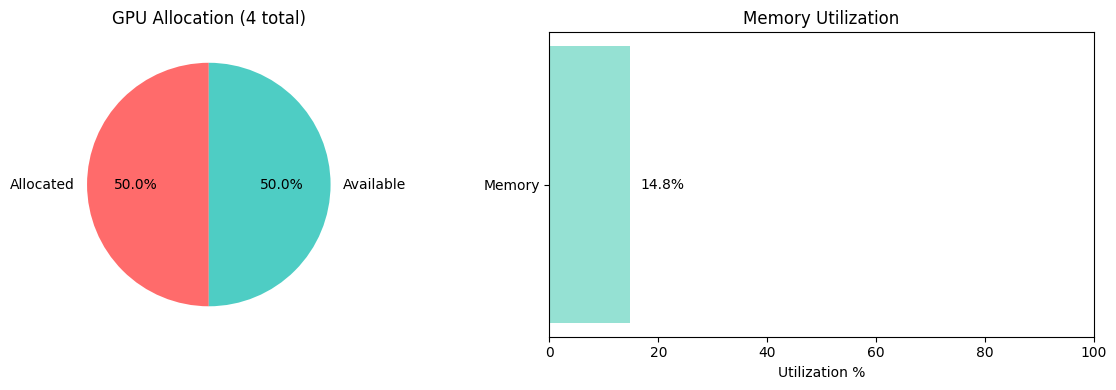

In [9]:
# Demo: Simulate GPU utilization
print("GPU Utilization Summary:")
print("  Total GPUs: 4")
print("  Allocated: 2")
print("  Available: 2")
print("  Average utilization: 48.9%")
print("  Memory used: 23.6GB / 160.0GB (14.8%)")
print()

# Try to create visualization
try:
    import matplotlib.pyplot as plt
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # GPU allocation pie chart
    ax1.pie(
        [2, 2],
        labels=['Allocated', 'Available'],
        autopct='%1.1f%%',
        colors=['#ff6b6b', '#4ecdc4'],
        startangle=90
    )
    ax1.set_title('GPU Allocation (4 total)')
    
    # Memory usage bar chart
    ax2.barh(['Memory'], [14.8], color='#95e1d3')
    ax2.set_xlim(0, 100)
    ax2.set_xlabel('Utilization %')
    ax2.set_title('Memory Utilization')
    ax2.text(14.8 + 2, 0, f'14.8%', va='center')
    
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("💡 Matplotlib not available. Install with: pip install matplotlib")